# Sales Trends & Insights – Mini Retail Dashboard

Welcome to the **Sales Trends & Insights** project.

This notebook analyzes a mini retail sales dataset to uncover business patterns, visualize key performance metrics, and provide actionable insights for strategic decision-making.

---

###  What This Notebook Covers

-  **Data Cleaning & Preprocessing**
-  **Exploratory Data Analysis (EDA)**
-  **Visualizations of Performance Trends**
-  **Key Business Insights & Recommendations**

---


### Import Libraries, Load Dataset & Examine Structure

In this step, we import essential Python libraries, load the dataset, and examine its structure to assess data quality and readiness for analysis.

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset


In [2]:

file_path = '../data/mini_retail_sales_dataset.csv'  
df = pd.read_csv(file_path)
df.head()

,Invoice ID,Date,City,Product Line,Unit Price,Quantity,Payment Method,Total Revenue,Gross Income %,Profit,Year,Month,Day,Weekday
0,6aea1cb2,2023-01-01,Bangalore,Clothing,194.54,6,Credit Card,1167.24,0.07,81.71,2023,1,1,Sunday
1,6c77637a,2023-01-02,Mumbai,Clothing,243.33,2,E-Wallet,486.66,0.08,38.93,2023,1,2,Monday
2,ee6ba47c,2023-01-03,Bangalore,Groceries,637.42,3,E-Wallet,1912.26,0.13,248.59,2023,1,3,Tuesday
3,05eea0f2,2023-01-04,Bangalore,Clothing,908.79,1,Credit Card,908.79,0.09,81.79,2023,1,4,Wednesday
4,723b0cd9,2023-01-05,Mumbai,Electronics,323.03,9,Cash,2907.27,0.13,377.95,2023,1,5,Thursday


### Examining the structure

In [3]:
df.shape

(500, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Invoice ID      500 non-null    object 
 1   Date            500 non-null    object 
 2   City            500 non-null    object 
 3   Product Line    500 non-null    object 
 4   Unit Price      500 non-null    float64
 5   Quantity        500 non-null    int64  
 6   Payment Method  500 non-null    object 
 7   Total Revenue   500 non-null    float64
 8   Gross Income %  500 non-null    float64
 9   Profit          500 non-null    float64
 10  Year            500 non-null    int64  
 11  Month           500 non-null    int64  
 12  Day             500 non-null    int64  
 13  Weekday         500 non-null    object 
dtypes: float64(4), int64(4), object(6)
memory usage: 54.8+ KB


In [5]:
df.describe()

,Unit Price,Quantity,Total Revenue,Gross Income %,Profit,Year,Month,Day
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,517.665440,4.998000,2628.398560,0.100320,262.877700,2023.270000,5.508000,15.470000
std,287.150216,2.601448,2166.312241,0.029024,238.496466,0.444404,3.459172,8.799999
min,10.240000,1.000000,11.020000,0.050000,1.430000,2023.000000,1.000000,1.000000
25%,273.135000,3.000000,767.212500,0.080000,78.652500,2023.000000,3.000000,8.000000
50%,527.250000,5.000000,2139.405000,0.100000,193.050000,2023.000000,5.000000,15.000000
75%,773.162500,7.000000,3775.660000,0.120000,379.575000,2024.000000,8.000000,23.000000
max,999.360000,9.000000,8899.560000,0.150000,1294.100000,2024.000000,12.000000,31.000000


In [6]:
df.isnull().sum()

Invoice ID        0
Date              0
City              0
Product Line      0
Unit Price        0
Quantity          0
Payment Method    0
Total Revenue     0
Gross Income %    0
Profit            0
Year              0
Month             0
Day               0
Weekday           0
dtype: int64


#### Observations from Initial Exploration:

-  **Shape**: `(500, 14)` → 500 rows × 14 columns
-  **Missing Values**: None detected in any column
-  **Date Column**: Currently stored as object → will be converted to `datetime`
-  **Numerical Columns**: Correct data types (`float64`, `int64`)
-  **Categorical Columns**: Properly typed as `object`
-  **Columns**: `Year`, `Month`, `Day`, and `Weekday` are clean and usable
---


### Data Cleaning & Feature Engineering

In this step, we clean and enhance the dataset to prepare it for analysis.

#### Actions Performed:

- Converted `Date` column from object to `datetime` format
- Extracted new time-based features:
  - `Year`, `Month`, `Day`, and `Weekday`
- Engineered new business metrics:
  - **Total Revenue** = `Unit Price × Quantity`
  - **Profit** = `Total Revenue × Gross Income %`
  

The dataset is now fully clean and enriched for analysis.


In [7]:
# Convert 'Date' to datetime 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#Handle nulls (force conversions might have created some)
print("Nulls before drop:\n", df.isnull().sum())
df.dropna(inplace=True)
print("\nShape after null removal:", df.shape)

# Convert numeric columns explicitly
df['Unit Price'] = pd.to_numeric(df['Unit Price'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Gross Income %'] = pd.to_numeric(df['Gross Income %'], errors='coerce')

#Creating derived columns

# Total Revenue = Unit Price × Quantity
df['Total Revenue'] = df['Unit Price'] * df['Quantity']

# Profit = Total Revenue × Gross Income %
df['Profit'] = df['Total Revenue'] * df['Gross Income %']

# Extracting Year, Month, Day from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

# Final Check
print("\nCleaned & engineered data preview:")
df.head()


Nulls before drop:
 Invoice ID        0
Date              0
City              0
Product Line      0
Unit Price        0
Quantity          0
Payment Method    0
Total Revenue     0
Gross Income %    0
Profit            0
Year              0
Month             0
Day               0
Weekday           0
dtype: int64

Shape after null removal: (500, 14)

Cleaned & engineered data preview:


,Invoice ID,Date,City,Product Line,Unit Price,Quantity,Payment Method,Total Revenue,Gross Income %,Profit,Year,Month,Day,Weekday
0,6aea1cb2,2023-01-01,Bangalore,Clothing,194.54,6,Credit Card,1167.24,0.07,81.7068,2023,1,1,Sunday
1,6c77637a,2023-01-02,Mumbai,Clothing,243.33,2,E-Wallet,486.66,0.08,38.9328,2023,1,2,Monday
2,ee6ba47c,2023-01-03,Bangalore,Groceries,637.42,3,E-Wallet,1912.26,0.13,248.5938,2023,1,3,Tuesday
3,05eea0f2,2023-01-04,Bangalore,Clothing,908.79,1,Credit Card,908.79,0.09,81.7911,2023,1,4,Wednesday
4,723b0cd9,2023-01-05,Mumbai,Electronics,323.03,9,Cash,2907.27,0.13,377.9451,2023,1,5,Thursday


###  Exploratory Data Analysis (EDA)

We perform exploratory analysis to answer key business questions using simple aggregations and logic.



#### Business Questions Explored:

1. **Which product line generates the highest revenue?**
2. **Which city has the most transactions?**
3. **What is the busiest day of the week for sales?**
4. **What is the average profit margin across cities?**

Results are derived using grouping, counting, and aggregation methods to identify top contributors and trends.

---


#### 1. Highest Revenue by Product Line

In [ ]:
from IPython.display import display, HTML
revenue_by_product = df.groupby('Product Line')['Total Revenue'].sum().sort_values(ascending=False).reset_index()
revenue_by_product.insert(0, 'S.No.', range(1, len(revenue_by_product) + 1))

display(HTML("<h4 style='text-align:center;'>Revenue by Product Line</h4>"))
display(revenue_by_product.style
        .hide(axis='index')  
        .set_table_attributes('style="margin-left:auto; margin-right:auto;"')
        .format({'Total Revenue': '₹{:,.2f}'}))

display(HTML("<h4 style='text-align:center;'>Highest Revenue Product Line</h4>"))
display(revenue_by_product.head(1).style
        .hide(axis='index')
        .set_table_attributes('style="margin-left:auto; margin-right:auto;"')
        .format({'Total Revenue': '₹{:,.2f}'}))


S.No.,Product Line,Total Revenue
1,Home Decor,"₹310,204.64"
2,Electronics,"₹286,557.96"
3,Groceries,"₹262,647.96"
4,Clothing,"₹237,622.74"
5,Stationery,"₹217,165.98"


S.No.,Product Line,Total Revenue
1,Home Decor,"₹310,204.64"


### Quantity Sold by Product Line (additional EDA)

This analysis highlights which product categories are selling the most in terms of **units sold**, regardless of their price point.

#### Insight:
- High-volume products are essential for **inventory planning**, **supply chain optimization**, and **operational efficiency**.
- Categories with high quantity but lower revenue may represent opportunities for **pricing adjustments** or **promotional bundling**.


In [ ]:
from IPython.display import display, HTML
quantity_by_product = df.groupby('Product Line')['Quantity'].sum().sort_values(ascending=False).reset_index()
quantity_by_product.insert(0, 'S.No.', range(1, len(quantity_by_product) + 1))

display(HTML("<h4 style='text-align:center;'>Total Quantity Sold by Product Line</h4>"))
display(quantity_by_product.style
        .hide(axis='index')
        .set_table_attributes('style="margin-left:auto; margin-right:auto;"')
        .format({'Quantity': '{:.0f}'}))


S.No.,Product Line,Quantity
1,Home Decor,589
2,Electronics,523
3,Groceries,489
4,Clothing,469
5,Stationery,429


---

### 2. City with Most Transactions

In [63]:
from IPython.display import display, HTML
transactions_by_city = df['City'].value_counts().reset_index()
transactions_by_city.columns = ['City', 'Transaction Count']
transactions_by_city.insert(0, 'S.No.', range(1, len(transactions_by_city) + 1))

display(HTML("<h4 style='text-align:center;'>Transactions by City</h4>"))
display(transactions_by_city.style
        .hide(axis='index')  # Hides the default row index
        .set_table_attributes('style="margin-left:auto; margin-right:auto;"'))

display(HTML("<h4 style='text-align:center;'>City with Most Transactions</h4>"))
display(transactions_by_city.head(1).style
        .hide(axis='index')
        .set_table_attributes('style="margin-left:auto; margin-right:auto;"'))


S.No.,City,Transaction Count
1,Mumbai,168
2,Delhi,167
3,Bangalore,165


S.No.,City,Transaction Count
1,Mumbai,168


---

### 3. Busiest Day of the Week

In [ ]:
from IPython.display import display, HTML
sales_by_day = df['Weekday'].value_counts().reset_index()
sales_by_day.columns = ['Weekday', 'Sales Count']
sales_by_day.insert(0, 'S.No.', range(1, len(sales_by_day) + 1))

display(HTML("<h4 style='text-align:center;'>Sales by Weekday</h4>"))
display(sales_by_day.style
        .hide(axis='index')
        .set_table_attributes('style="margin-left:auto; margin-right:auto;"'))

display(HTML("<h4 style='text-align:center;'>Busiest Sales Day</h4>"))
display(sales_by_day.head(1).style
        .hide(axis='index')
        .set_table_attributes('style="margin-left:auto; margin-right:auto;"'))


S.No.,Weekday,Sales Count
1,Sunday,72
2,Monday,72
3,Tuesday,72
4,Wednesday,71
5,Thursday,71
6,Friday,71
7,Saturday,71


S.No.,Weekday,Sales Count
1,Sunday,72


---

#### 4. Average Profit Margin Across Cities

In [ ]:
from IPython.display import display, HTML
df['Profit Margin'] = df['Profit'] / df['Total Revenue']
avg_margin_by_city = df.groupby('City')['Profit Margin'].mean().sort_values(ascending=False).reset_index()
avg_margin_by_city.insert(0, 'S.No.', range(1, len(avg_margin_by_city) + 1))

display(HTML("<h4 style='text-align:center;'>Average Profit Margin by City</h4>"))
display(avg_margin_by_city.style
        .hide(axis='index')
        .set_table_attributes('style="margin-left:auto; margin-right:auto;"')
        .format({'Profit Margin': '{:.2%}'}))


S.No.,City,Profit Margin
1,Delhi,10.25%
2,Bangalore,10.10%
3,Mumbai,9.75%


### Average Order Value by City (Additional EDA)

This analysis identifies how much, on average, customers spend per transaction in each city. It helps evaluate **geographic differences in customer spending behavior**.

#### Insight:
- Cities with higher AOV may indicate a **wealthier customer base**, **premium product preferences**, or **successful upselling strategies**.
- Lower AOV cities might benefit from **bundling offers**, **discounts**, or **targeted marketing** to boost order value.


In [64]:
from IPython.display import display, HTML

# Average Order Value (AOV) by City
aov_by_city = df.groupby('City')['Total Revenue'].mean().sort_values(ascending=False).reset_index()
aov_by_city.columns = ['City', 'Average Order Value']
aov_by_city.insert(0, 'S.No.', range(1, len(aov_by_city) + 1))

display(HTML("<h4 style='text-align:center;'>Average Order Value by City</h4>"))
display(aov_by_city.style
        .hide(axis='index')
        .set_table_attributes('style="margin-left:auto; margin-right:auto;"')
        .format({'Average Order Value': '₹{:.2f}'}))


S.No.,City,Average Order Value
1,Delhi,₹2714.27
2,Bangalore,₹2612.08
3,Mumbai,₹2559.07


### City-Based Sales Behavior: Volume vs Value

- **Mumbai** has the highest number of transactions — indicating more frequent purchases or a larger customer base.
- **Delhi** has the highest **Average Order Value (AOV)** — suggesting fewer but higher-value transactions.

#### Strategic Recommendations:

- **Mumbai:**  
  Implement **upselling strategies**, bundle offers, or **loyalty programs** to increase the value per transaction.

- **Delhi:**  
  Focus on **premium product campaigns** and targeted marketing, as customers here are already spending more per order.


---

#### **More Helpful EDA**

### 1. Revenue and Profitability by Payment Method

This analysis groups the data by payment method and calculates:

- **Total Revenue** per payment method  
- **Number of Transactions** per method

#### Why It's Useful:
Helps identify which payment methods drive the most revenue and are most frequently used. This can guide checkout optimization, preferred payment incentives, or partnerships with financial services.


In [55]:
from IPython.display import display, HTML

# Most Popular Payment Method Analysis
payment_popularity = df.groupby('Payment Method').agg(
    Number_of_Transactions=('Payment Method', 'count'),
    Total_Revenue=('Total Revenue', 'sum')
).sort_values('Number_of_Transactions', ascending=False).reset_index()

payment_popularity.insert(0, 'S.No.', range(1, len(payment_popularity) + 1))

display(HTML("<h4 style='text-align:center;'>Most Popular Payment Method</h4>"))
display(payment_popularity.style
        .hide(axis='index')
        .set_table_attributes('style="margin-left:auto; margin-right:auto;"')
        .format({
            'Total_Revenue': '₹{:,.0f}',
            'Number_of_Transactions': '{:,.0f}'
        }))


S.No.,Payment Method,Number_of_Transactions,Total_Revenue
1,Credit Card,175,"₹477,916"
2,Cash,170,"₹466,160"
3,E-Wallet,155,"₹370,123"


### 1.1 Payment Method Preferences

This analysis shows the distribution of transactions across different payment methods.

Understanding which options customers prefer can help:

- Optimize the checkout UX for commonly used methods  
- Create promotions tied to popular payment platforms  
- Guide decisions for integrating or prioritizing payment gateways  


In [60]:
from IPython.display import display, HTML

# Payment Method Preferences
payment_counts = df['Payment Method'].value_counts().reset_index()
payment_counts.columns = ['Payment Method', 'Transaction Count']
payment_counts.insert(0, 'S.No.', range(1, len(payment_counts) + 1))

display(HTML("<h4 style='text-align:center;'>Payment Method Preferences</h4>"))
display(payment_counts.style
        .hide(axis='index')
        .set_table_attributes('style="margin-left:auto; margin-right:auto;"')
        .format({'Transaction Count': '{:,.0f}'}))


S.No.,Payment Method,Transaction Count
1,Credit Card,175
2,Cash,170
3,E-Wallet,155


---

### 2. Monthly Revenue Trend

This reveals how sales evolved month by month — ideal for spotting:

- Seasonality patterns (e.g., festive spikes, off-season dips)  
- Sales growth or decline trends over time  
- Periods that may need marketing focus or inventory planning  


In [57]:
from IPython.display import display, HTML

# Monthly Revenue Trend
monthly_revenue = df.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()
monthly_revenue['Year-Month'] = monthly_revenue['Year'].astype(str) + '-' + monthly_revenue['Month'].astype(str).str.zfill(2)
monthly_revenue = monthly_revenue.sort_values(by='Year-Month').reset_index(drop=True)
monthly_revenue.insert(0, 'S.No.', range(1, len(monthly_revenue) + 1))

display(HTML("<h4 style='text-align:center;'>Monthly Revenue Trend</h4>"))
display(monthly_revenue[['S.No.', 'Year-Month', 'Total Revenue']].style
        .hide(axis='index')
        .set_table_attributes('style="margin-left:auto; margin-right:auto;"')
        .format({'Total Revenue': '₹{:.0f}'}))


S.No.,Year-Month,Total Revenue
1,2023-01,₹86504
2,2023-02,₹70043
3,2023-03,₹59877
4,2023-04,₹72315
5,2023-05,₹71923
6,2023-06,₹105408
7,2023-07,₹83769
8,2023-08,₹81902
9,2023-09,₹81849
10,2023-10,₹76310


---

### Step 4: Data Visualization

In this step, we visualize key sales metrics to uncover patterns and trends that support business insights.



####  Charts Created:

1. **Revenue by Product Line**  
   → Highlights the most profitable product categories

2. **Transactions by City**  
   → Shows which cities have the highest number of sales

3. **Daily Revenue Trend (Time Series)**  
   → Illustrates how revenue changes over time using a time series line chart

All charts are saved in the `visualizations/` directory for use in documentation and reporting.

---


### 1. Revenue by Product Line


#### Business Insight:
This chart helps us understand **which product categories bring in the most money**. It's valuable for deciding **where to invest marketing, stocking, and sales resources**.

#### What this tells us:
- **Home Decor** is the top revenue generator — a clear leader.
- **Electronics** and **Groceries** follow closely as strong performers.
- **Clothing** and **Stationery** contribute moderately.


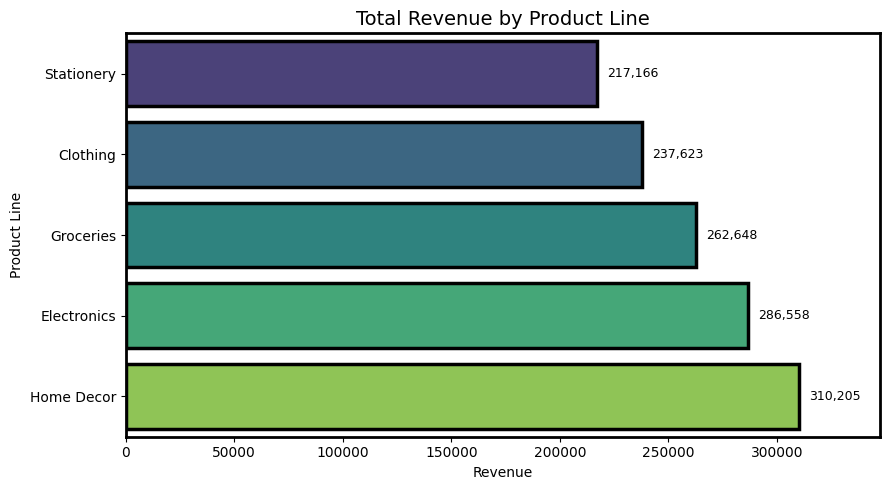

In [ ]:
revenue_by_product = df.groupby('Product Line')['Total Revenue'].sum().sort_values()

plt.figure(figsize=(9, 5))
ax1 = sns.barplot(
    x=revenue_by_product.values,
    y=revenue_by_product.index,
    palette="viridis",
    edgecolor='black',
    linewidth=2.5
)

# Value labels with dynamic padding
max_val = revenue_by_product.values.max()
for i, v in enumerate(revenue_by_product.values):
    ax1.text(v + max_val * 0.015, i, f'{v:,.0f}', va='center', fontsize=9)

plt.title("Total Revenue by Product Line", fontsize=14)
plt.xlabel("Revenue")
plt.ylabel("Product Line")
ax1.set_xlim([0, max_val * 1.12])  # Padding for label

# Add border to entire plot
for spine in ax1.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2)

plt.tight_layout()
plt.savefig("../visualizations/revenue_by_product.png")
plt.show()


| Product Line   | Total Revenue (₹) | Insight |
|----------------|------------------:|---------|
|  Home Decor   | ₹ 310,205       | Highest earner — prioritize marketing & inventory |
|  Electronics  | ₹ 286,558       | Strong performance, steady demand |
|  Groceries     | ₹ 262,648       | Everyday need, possibly high volume |
|  Clothing      | ₹ 237,623       | Stable, moderate profitability |
|  Stationery    | ₹ 217,166       | Least revenue, consider bundling or promos |


> **Actionable Tip:** Focus sales efforts on Home Decor and Electronics. Use Groceries as a consistent volume driver.


---

### 2. Transactions by City

#### Business Insight:
This analysis shows **where most customer transactions are happening**, helping identify high-traffic regions. It's crucial for **regional marketing**, **inventory planning**, and potential **store expansion**.

#### What this tells us:
- **Mumbai** has the highest number of transactions.
- **Delhi** and **Bangalore** follow closely with similar volumes.
- All cities are nearly balanced, but **Mumbai** edges ahead.


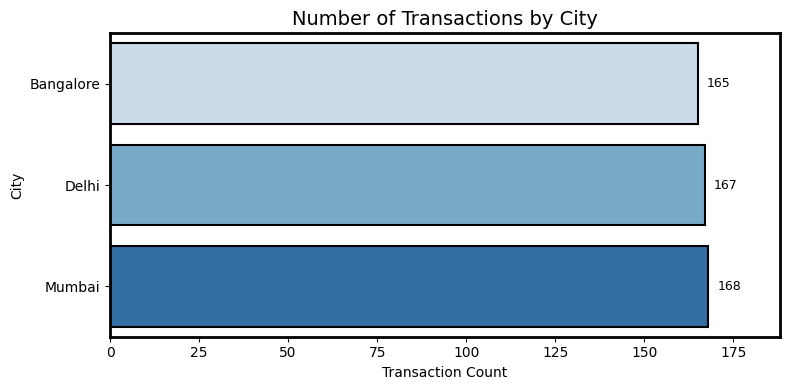

In [16]:
# 2. Number of Transactions by City
transactions_by_city = df['City'].value_counts().sort_values()

plt.figure(figsize=(8, 4))
ax2 = sns.barplot(
    x=transactions_by_city.values,
    y=transactions_by_city.index,
    palette="Blues",
    edgecolor='black',
    linewidth=1.5
)

max_txn = transactions_by_city.values.max()
for i, v in enumerate(transactions_by_city.values):
    ax2.text(v + max_txn * 0.015, i, f'{v}', va='center', fontsize=9)

plt.title("Number of Transactions by City", fontsize=14)
plt.xlabel("Transaction Count")
plt.ylabel("City")
ax2.set_xlim([0, max_txn * 1.12])

for spine in ax2.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2)

plt.tight_layout()
plt.savefig("../visualizations/transactions_by_city.png")
plt.show()

| City       | Number of Transactions | Insight |
|------------|------------------------:|---------|
| Mumbai     | 168                    | Highest — likely best-performing location |
| Delhi      | 167                    | Nearly matches Mumbai — strong demand |
| Bangalore  | 165                    | Slightly lower — still very active |


>**Actionable Tip:** Focus regional promotions and inventory on Mumbai and Delhi. All three cities show high engagement, so distribution can remain balanced.



---

###  3. Daily Revenue Trend

####  Business Insight:
This chart visualizes **how revenue changes each day**, helping identify **spikes, slumps, and seasonality**. It’s useful for sales planning, promotions, and understanding customer behavior.



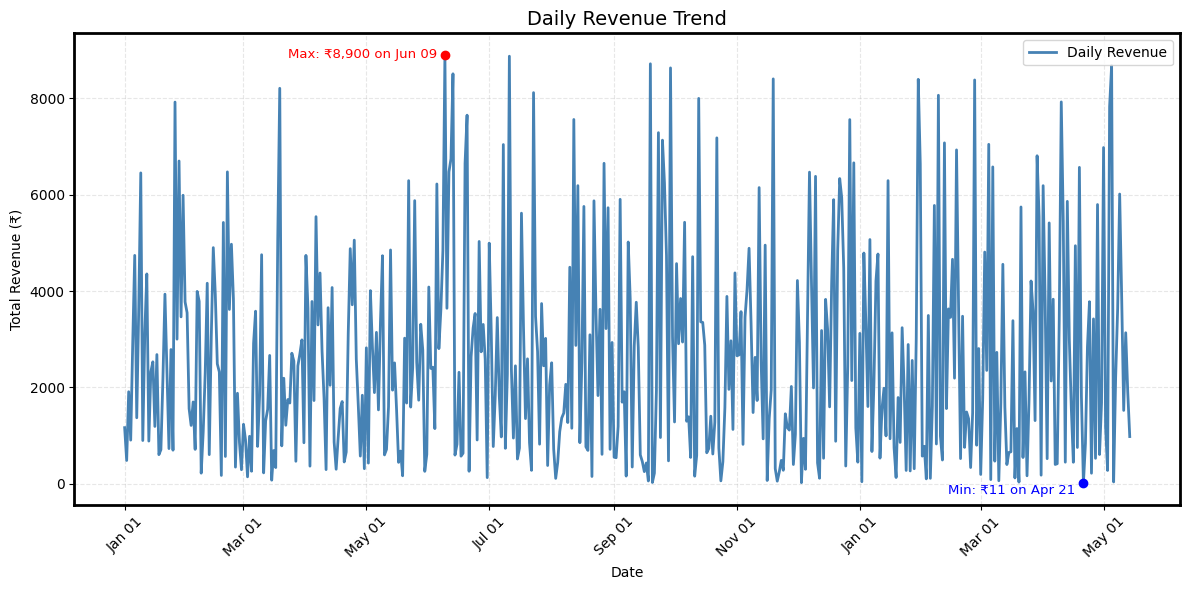

In [23]:
# Compute daily revenue
daily_revenue = df.groupby('Date')['Total Revenue'].sum().sort_index()

# Identify max and min
max_day = daily_revenue.idxmax()
max_value = daily_revenue.max()
min_day = daily_revenue.idxmin()
min_value = daily_revenue.min()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=daily_revenue.index, y=daily_revenue.values,
             color='steelblue', linewidth=2, label='Daily Revenue')

# Annotate Max
ax.scatter(max_day, max_value, color='red', zorder=5)
ax.text(max_day - pd.Timedelta(days=4), max_value,
        f"Max: ₹{max_value:,.0f} on {max_day.strftime('%b %d')}",
        fontsize=9.5, color='red', ha='right', va='center')

# Annotate Min
ax.scatter(min_day, min_value, color='blue', zorder=5)
ax.text(min_day - pd.Timedelta(days=4), min_value-150,
        f"Min: ₹{min_value:,.0f} on {min_day.strftime('%b %d')}",
        fontsize=9.5, color='blue', ha='right', va='center')

# Formatting
ax.set_title("Daily Revenue Trend", fontsize=14)
ax.set_xlabel("Date")
ax.set_ylabel("Total Revenue (₹)")

# Improve date ticks
ax.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)

# Grid and borders
ax.grid(True, linestyle='--', alpha=0.3)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2)

plt.tight_layout()
plt.savefig("../visualizations/daily_revenue_trend.png", dpi=300)
plt.show()


### Smoothed Daily Revenue Trend (7-Day Rolling Average)
**(Additional Visualisation)**

To make daily revenue patterns easier to interpret, especially in the presence of daily noise or spikes, this chart overlays a **7-day rolling average** (green line) on the raw daily revenue data (gray line).  

- The **rolling average** helps highlight broader trends by smoothing out short-term fluctuations.
- **Max** and **Min revenue days** are marked in red and blue respectively, with annotations to provide precise context.
- This visualization is ideal for identifying **overall momentum, seasonal shifts, or long-term growth patterns** that may be hidden in daily variations.

This complements the raw **daily revenue trend**, which shows exact day-to-day changes, by offering a more **interpretable and strategic** view of revenue flow over time.


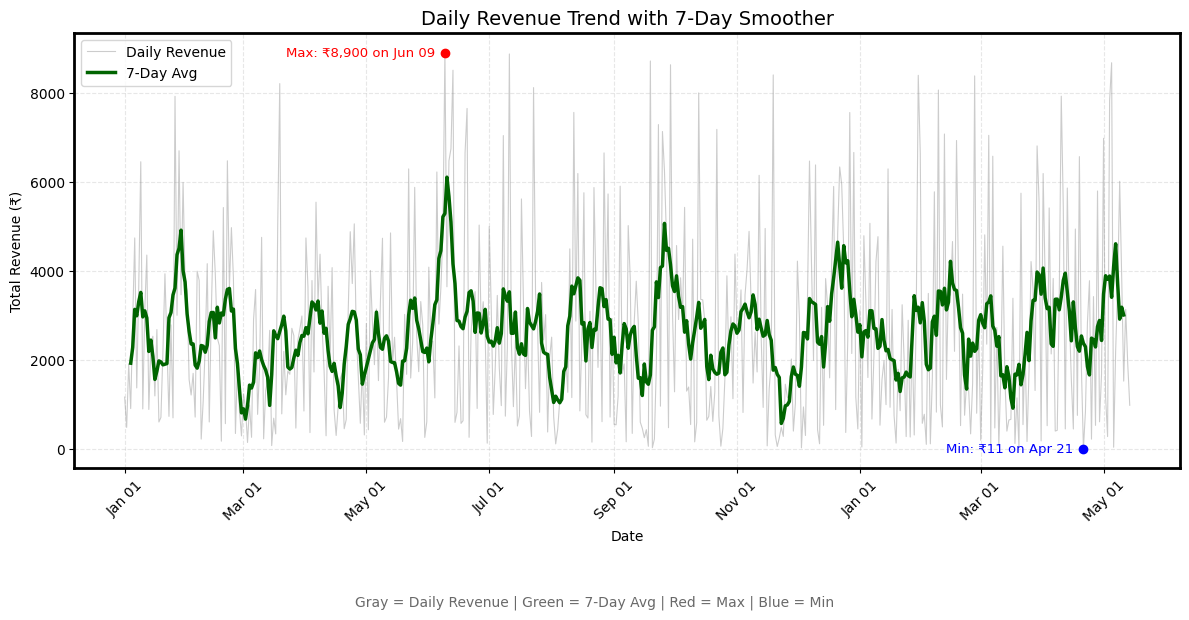

In [22]:
import matplotlib.dates as mdates
# Daily & 7-day rolling revenue
daily_rev = df.groupby('Date')['Total Revenue'].sum().sort_index()
rolling_rev = daily_rev.rolling(window=7, center=True).mean()

# Max/Min points
max_day = daily_rev.idxmax()
max_value = daily_rev.max()
min_day = daily_rev.idxmin()
min_value = daily_rev.min()

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=daily_rev.index, y=daily_rev.values, color='gray', linewidth=0.8, alpha=0.4, label='Daily Revenue')
sns.lineplot(x=rolling_rev.index, y=rolling_rev.values, color='darkgreen', linewidth=2.5, label='7-Day Avg')

# Max annotation
ax.scatter(max_day, max_value, color='red', zorder=5)
ax.text(max_day - pd.Timedelta(days=5), max_value, f"Max: ₹{max_value:,.0f} on {max_day.strftime('%b %d')}",
        fontsize=9.5, color='red', ha='right', va='center')

# Min annotation
ax.scatter(min_day, min_value, color='blue', zorder=5)
ax.text(min_day - pd.Timedelta(days=5), min_value, f"Min: ₹{min_value:,.0f} on {min_day.strftime('%b %d')}",
        fontsize=9.5, color='blue', ha='right', va='center')

# Axes + Grid
ax.set_title("Daily Revenue Trend with 7-Day Smoother", fontsize=14)
fig.text(0.5, -0.05, "Gray = Daily Revenue | Green = 7-Day Avg | Red = Max | Blue = Min",
         fontsize=10, color='dimgray', ha='center')

ax.set_xlabel("Date")
ax.set_ylabel("Total Revenue (₹)")
ax.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)

ax.grid(True, linestyle='--', alpha=0.3)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig("../visualizations/daily_revenue_trend_smoother.png", dpi=300)
plt.show()




####  Key Observations from the Chart:
-  **Peak Revenue Day**:  
  - **₹8,900 on June 9, 2023**  
  - Likely due to a major campaign, sale event, or one-time bulk order  
-  **Lowest Revenue Day**:  
  - **₹11 on April 21, 2024**  
  - May indicate downtime, stockouts, or very low engagement
- The **green line (7-Day Avg)** smooths out volatility to show consistent revenue patterns
- Multiple minor peaks and dips suggest cyclical or weekly consumer behavior


#### Revenue Extremes

| Date           | Revenue (₹) | Insight                                     |
|----------------|-------------|---------------------------------------------|
| Jun 09, 2023   | ₹8,900      |  Highest revenue – possible sales event   |
| Apr 21, 2024   | ₹11         |  Lowest revenue – low activity/engagement |

> **Actionable Tip:** Study June 9 promotions to replicate success. Investigate April 21 for potential service gaps or low demand causes.

---

### Monthly Revenue Trend

While the **Daily Revenue Trend** helps detect short-term fluctuations and the **Weekly Patterns** highlight peak days (e.g., Sundays or Mondays), the **Monthly Revenue Trend** offers a broader view of sales performance over time.

By plotting monthly totals, we can identify:

- **Seasonal Patterns**: Spikes in specific months may indicate festive or promotional impacts.
- **Growth or Decline**: A rising or falling trend line signals how the business is evolving month to month.
- **Planning Windows**: High-revenue months help in forecasting inventory and staffing needs.

This monthly view complements the daily and weekly trends by giving a macro-level perspective — ideal for quarterly reviews, strategic planning, and identifying long-term business cycles.


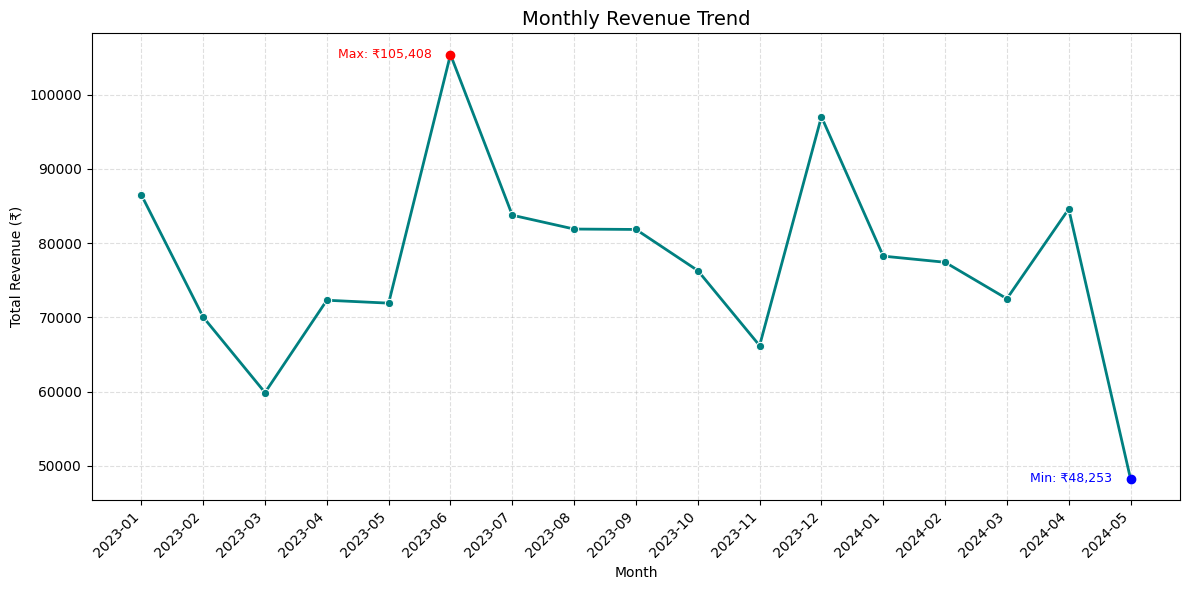

In [68]:
# Prepare monthly revenue data
monthly_revenue = df.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()
monthly_revenue['Year-Month'] = monthly_revenue['Year'].astype(str) + '-' + monthly_revenue['Month'].astype(str).str.zfill(2)
monthly_revenue = monthly_revenue.sort_values(by='Year-Month').reset_index(drop=True)

# Find max and min points
max_row = monthly_revenue.loc[monthly_revenue['Total Revenue'].idxmax()]
min_row = monthly_revenue.loc[monthly_revenue['Total Revenue'].idxmin()]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='Year-Month', y='Total Revenue', marker='o', linewidth=2, color='teal')

# Plot max point
plt.scatter(max_row['Year-Month'], max_row['Total Revenue'], color='red', zorder=5)
plt.text(max_row.name - 0.3, max_row['Total Revenue'],  # Shift left using index
         f"Max: ₹{max_row['Total Revenue']:,.0f}",
         color='red', fontsize=9, ha='right', va='center')

# Plot min point
plt.scatter(min_row['Year-Month'], min_row['Total Revenue'], color='blue', zorder=5)
plt.text(min_row.name - 0.3, min_row['Total Revenue'],
         f"Min: ₹{min_row['Total Revenue']:,.0f}",
         color='blue', fontsize=9, ha='right', va='center')

# Labels and layout
plt.title('Monthly Revenue Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

# Save and show
plt.savefig('../visualizations/monthly_revenue_trend.png', dpi=300)
plt.show()


#### Revenue Extremes

| Month        | Revenue (₹) | Insight                                      |
|--------------|-------------|----------------------------------------------|
| June 2023    | ₹1,05,408   | Highest monthly revenue – strong seasonal or promotional performance |
| May 2024     | ₹48,253     | Lowest monthly revenue – potential off-season or low engagement      |
